### The following code is used understand the data given out by the VGGish model. 
The shape of the array that is given out of the model is of the form [num_examples, num_frames, num_bands]. 
In this each num_example represents 96 frames of 10 milisecoond windows. And each number in the num_frames represents the 64 frequency intensities of that 10 milisecond window. 
Towards the end the file plots all the spectrograms for all the 10 milisecond windows and then grooups them based on how similar they are to each other. 

TODO - Make the size of the final plotting a little big so that the clustering can be visble more clearly. 

In [1]:
import tensorflow as tf
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt

In [2]:
# the following code loads the 3d numpy array output that we get from the 
# file vggish_input.py 
# the shape of this array is [num_examples, num_frames, num_bands]
specs = np.load('readnumpy.npy') # the bigger array 

In [9]:
# reading the contents of the tf records that we get as output for the 
# vggish_inference_demo.py.

tfrecords_filename = 'result.tfrecord'
record_iterator = tf.python_io.tf_record_iterator(path=tfrecords_filename)
string_record = next(record_iterator)
example = tf.train.SequenceExample()
example.ParseFromString(string_record)

f = example.feature_lists.feature_list['audio_embedding']

hexembed = f.feature[59].bytes_list.value[0].hex()

vggish_embed = [int(hexembed[i:i+2],16) for i in range(0,len(hexembed),2)]

In [10]:
# the smaller array that we have 
# the mamimum range of the f is 59 ie there are 60 observations in f. 

len(vggish_embed) 

128

In [11]:
# this is not that much importance to us 
len(hexembed)

256

In [12]:
# getting all the 60 observations in the form of an array rather than a tf record for easy understanding and 
# usage

answer = []
for x in range(0, 60):
    temp = f.feature[x].bytes_list.value[0].hex()
    answer.append([int(temp[i:i+2],16) for i in range(0,len(temp),2)])

In [13]:
# 60 observations and 128 features

answer = np.array(answer)
answer.shape

(60, 128)

In [14]:
# doing PCA decomposition of the numpy array answer 
pca = decomposition.PCA()
pca.fit(answer)
print(pca)

# applying dimentionaly reduction to that array 
transformed_data = pca.transform(answer)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


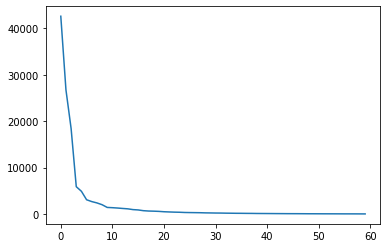

In [15]:
plt.plot(pca.explained_variance_)

In [16]:
# storing the first two componets of the PCA in two varibales for easy plotting later 

first_pc = pca.components_[0]
second_pc = pca.components_[1]

In [17]:
# selecting all the rows for the first 2 columns 
# here colum 2 is not selected and only 0, 1 colum is selected 
# we are selecting only 2 columns becasue we need to plot the data on a 2d graph. 

X_transformed = transformed_data[:,0:2]

In [18]:
transformed_data.shape

plot1 = transformed_data[:,0]
plot2 = transformed_data[:,1]

In [19]:
print(first_pc)
print(len(first_pc))

[ 7.97873414e-03  6.10866504e-03 -7.65044855e-03  2.05240545e-02
 -4.99350729e-03 -2.55379163e-03 -5.39508009e-02 -8.56979619e-03
 -7.29677948e-03 -5.84680703e-02  5.62152173e-02 -9.53525035e-02
 -9.57091303e-03 -4.41276056e-02 -3.39777337e-05 -5.14907663e-02
  2.34876631e-02  4.10247779e-02 -3.63189535e-02  5.94425832e-02
  1.45222610e-02 -2.41308625e-02  7.68720281e-02  3.65805286e-02
  1.03475709e-02  4.76120504e-02  8.09991753e-02 -1.06815202e-01
  3.22715470e-02  2.26462964e-02 -1.45339904e-01  1.23987051e-01
  5.93242315e-02  2.10144048e-02  4.23392571e-02 -1.48239709e-01
  4.20700578e-02  3.69510128e-02 -1.94546905e-01  5.99601881e-02
 -5.83661376e-02  3.13002977e-02  3.60153521e-02  6.92820277e-02
 -1.35200160e-01 -1.09017705e-01 -2.98950215e-02 -1.43848023e-01
 -6.68557583e-02  1.32524979e-01 -1.08524394e-01  7.91156087e-03
  1.27618670e-01 -8.26154270e-02  9.63177165e-02  1.08527042e-01
  1.52094583e-02  4.30811453e-02 -5.00248924e-03 -5.37856416e-02
 -5.91913982e-02 -6.87403

In [20]:
print(second_pc)
print(len(second_pc))

[-1.15133449e-02 -7.81936817e-03 -5.86405868e-03 -2.46591980e-03
 -1.68349956e-02 -2.92468839e-02 -6.57897295e-04 -1.85703128e-03
  4.15629802e-02 -1.14893743e-02 -6.08485937e-02 -2.79270601e-02
  2.19950732e-02  2.71016446e-02 -8.08162103e-02 -5.58340676e-02
  3.25390662e-02 -6.50150542e-02 -6.37656347e-02  6.44006975e-03
 -1.09466832e-02 -6.80541829e-03  7.66667591e-02  2.80764550e-02
  2.63949657e-03 -8.84577749e-02  3.47517156e-02 -6.18243769e-02
 -1.38276623e-02 -7.49602033e-03 -4.98629522e-02  5.03261920e-02
  2.97975848e-02 -1.24617329e-01  1.11163035e-02 -4.24671873e-02
 -5.67298098e-02  9.61788973e-02  2.24636941e-02 -5.96882602e-02
 -4.42594325e-02  7.16460728e-02 -9.53283562e-02  9.96409339e-03
  1.36541851e-01  8.29074620e-02 -2.26719839e-03 -2.15037053e-01
 -7.91065915e-02  8.06326357e-02 -1.17585719e-01 -1.37453327e-01
 -2.53587042e-02  8.08811201e-02  6.21972224e-02 -1.40827184e-01
 -1.18734779e-02 -3.23802891e-02  4.49028108e-02  4.52127321e-03
 -7.83349700e-02 -4.17217

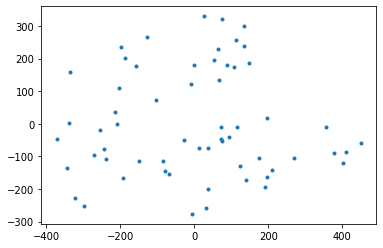

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# this is a tweek that is done to make changes to the plot
x = np.linspace(0, 2, 100)

plt.plot(plot1, plot2, ".")

plt.show()

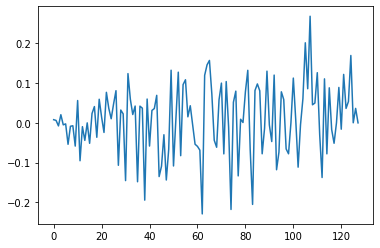

In [22]:
plt.plot(pca.components_[0])

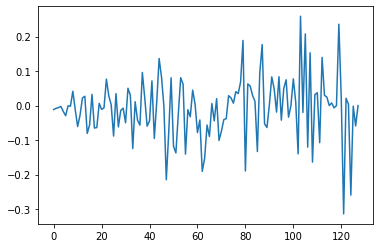

In [23]:
plt.plot(pca.components_[1])

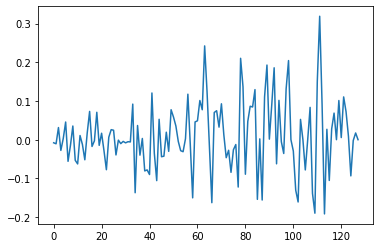

In [24]:
plt.plot(pca.components_[2])

In [25]:
from matplotlib import offsetbox

def plot_embedding(X_transformed, X, title=None, y = None):
    x_min, x_max = np.min(X_transformed, 0), np.max(X_transformed, 0)
    X_transformed = (X_transformed - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X_transformed.shape[0]):
        if y is None:
            plt.text(X_transformed[i, 0], X_transformed[i, 1], str("o"),
                     fontdict={'weight': 'bold', 'size': 9})
        else:
            plt.text(X_transformed[i, 0], X_transformed[i, 1], str(y[i]),
                     color=plt.cm.Set1(y[i] / 10.),
                     fontdict={'weight': 'bold', 'size': 9})
            

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X_transformed.shape[0]):
            dist = np.sum((X_transformed[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X_transformed[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X[i, :, :], cmap=plt.cm.gray_r),
                X_transformed[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


In [28]:
X_transformed.shape
# TODO : 
# color 
# size 
# transform them
# make the figure bigger

(60, 2)

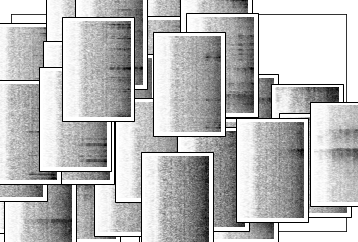

In [27]:
plot_embedding(X_transformed, specs)